# Timeseries anomaly detection using RNN-AutoEncoder

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

In [7]:
master_url_root = "https://raw.githubusercontent.com/numenta/NAB/master/data/"

df_small_noise_url_suffix = "artificialNoAnomaly/art_daily_small_noise.csv"
df_small_noise_url = master_url_root + df_small_noise_url_suffix
df_small_noise = pd.read_csv(df_small_noise_url,parse_dates=['timestamp'],index_col=0 )

df_daily_jumpsup_url_suffix = "artificialWithAnomaly/art_daily_jumpsup.csv"
df_daily_jumpsup_url = master_url_root + df_daily_jumpsup_url_suffix
df_daily_jumpsup = pd.read_csv(df_daily_jumpsup_url,parse_dates=['timestamp'],index_col=0 )

In [8]:
# 정상 패턴 데이터
df_small_noise.head()

,value
timestamp,
2014-04-01 00:00:00,18.324919
2014-04-01 00:05:00,21.970327
2014-04-01 00:10:00,18.624806
2014-04-01 00:15:00,21.953684
2014-04-01 00:20:00,21.909120


In [9]:
df_small_noise.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4032 entries, 2014-04-01 00:00:00 to 2014-04-14 23:55:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   4032 non-null   float64
dtypes: float64(1)
memory usage: 63.0 KB


In [10]:
# 이상치
df_daily_jumpsup.head()

,value
timestamp,
2014-04-01 00:00:00,19.761252
2014-04-01 00:05:00,20.500833
2014-04-01 00:10:00,19.961641
2014-04-01 00:15:00,21.490266
2014-04-01 00:20:00,20.187739


## visualize data

<AxesSubplot:title={'center':'daily_jumpup'}, xlabel='timestamp'>

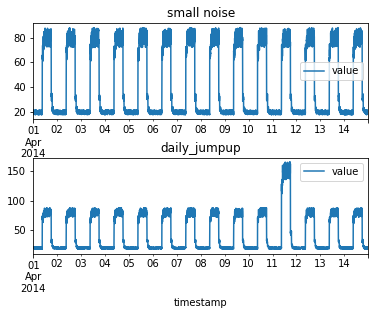

In [25]:
fig, axs = plt.subplots(2,1,figsize=(6,4))
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.4)

df_small_noise.plot(ax=axs[0],title='small noise')

df_daily_jumpsup.plot(ax=axs[1],title='daily_jumpup')

## scaling

In [26]:
def normalize(values):
    mean = np.mean(values)
    std = np.std(values)
    values = (values-mean)/std
    return values, mean, std

training_values, training_mean, training_std = normalize(df_small_noise.values)

## create sequence